In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Carregar os dados

In [19]:
df = pd.read_csv('spambase.data', header=None)
print(df.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Detalhes:

Algumas colunas, a exemplo 55 e 56, possuem valores em um range desproporcional ao range das demais colunas. Corrigiremos este problema utilizando uma normalização dos valores.

Podemos observar que temos um range de valores desproporcional através das colunas. A menor média de uma coluna é 0.005 enquanto que a maior é 283. Isso pode fazer com que a influência de determinada coluna seja muito maior que outras.

### Separar características e alvo

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

### Normalização

In [22]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X = pd.DataFrame(X)

### Divisão em Treinamento, Validação e Teste

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)

### Encontrando a Melhor Configuração de Hiperparâmetros

In [24]:
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000]
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [1000]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.2, 0.5, 0.8],
        'max_iter': [1000]
    },
    {
        'penalty': ['none'],
        'C': [1],  # C não é usado quando penalty é 'none'
        'solver': ['lbfgs', 'sag', 'newton-cg'],
        'max_iter': [1000]
    }
]

log_reg = LogisticRegression(random_state=42)

In [25]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [26]:
print("\nIniciando a busca pelos melhores hiperparâmetros para Regressão Logística...")
grid_search.fit(X_train, y_train)


Iniciando a busca pelos melhores hiperparâmetros para Regressão Logística...
Fitting 5 folds for each of 53 candidates, totalling 265 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 265.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.2, 0.5, 0.8], 'max_iter': [1000],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'C': [1], 'max_iter': [1000], 'penalty': ['none'],
                          'solver': ['lbfgs', 'sag', 'newton-cg']}],
             scoring='f1', verbose=2)

In [27]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"\nMelhores hiperparâmetros encontrados: {best_params}")
print(f"Melhor score de F1 no cross-validation: {best_score:.4f}")


Melhores hiperparâmetros encontrados: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score de F1 no cross-validation: 0.8786


In [28]:
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [29]:
y_val_pred = best_log_reg.predict(X_val)
val_f1 = f1_score(y_val, y_val_pred)
print(f"F1 score no conjunto de validação: {val_f1:.4f}")

F1 score no conjunto de validação: 0.8550


In [30]:
train_sizes = np.arange(0.05, 1.00, 0.05)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for size in train_sizes:
    # Determinar o número de amostras para o tamanho atual
    n_samples = int(size * X_train.shape[0])

    if n_samples < 1:
        n_samples = 1  # Garantir pelo menos uma amostra

    # Realizar amostragem estratificada
    X_train_subset, _, y_train_subset, _ = train_test_split(
        X_train, y_train,
        train_size=n_samples,
        stratify=y_train,
        random_state=42
    )

    clf = LogisticRegression(**best_params)
    clf.fit(X_train_subset, y_train_subset)

    y_val_pred = clf.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)

    print(f"Tamanho de treinamento: {size*100:.0f}% - Acurácia: {acc:.4f}, Precisão: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")


Tamanho de treinamento: 5% - Acurácia: 0.8157, Precisão: 0.7908, Recall: 0.7244, F1 Score: 0.7562
Tamanho de treinamento: 10% - Acurácia: 0.8561, Precisão: 0.7854, Recall: 0.8740, F1 Score: 0.8273
Tamanho de treinamento: 15% - Acurácia: 0.8696, Precisão: 0.8072, Recall: 0.8793, F1 Score: 0.8417
Tamanho de treinamento: 20% - Acurácia: 0.8789, Precisão: 0.8188, Recall: 0.8898, F1 Score: 0.8528
Tamanho de treinamento: 25% - Acurácia: 0.8861, Precisão: 0.8297, Recall: 0.8950, F1 Score: 0.8611
Tamanho de treinamento: 30% - Acurácia: 0.8913, Precisão: 0.8317, Recall: 0.9081, F1 Score: 0.8683
Tamanho de treinamento: 35% - Acurácia: 0.8872, Precisão: 0.8192, Recall: 0.9160, F1 Score: 0.8649
Tamanho de treinamento: 40% - Acurácia: 0.8913, Precisão: 0.8286, Recall: 0.9134, F1 Score: 0.8689
Tamanho de treinamento: 45% - Acurácia: 0.8830, Precisão: 0.8160, Recall: 0.9081, F1 Score: 0.8596
Tamanho de treinamento: 50% - Acurácia: 0.8841, Precisão: 0.8150, Recall: 0.9134, F1 Score: 0.8614
Tamanho de 

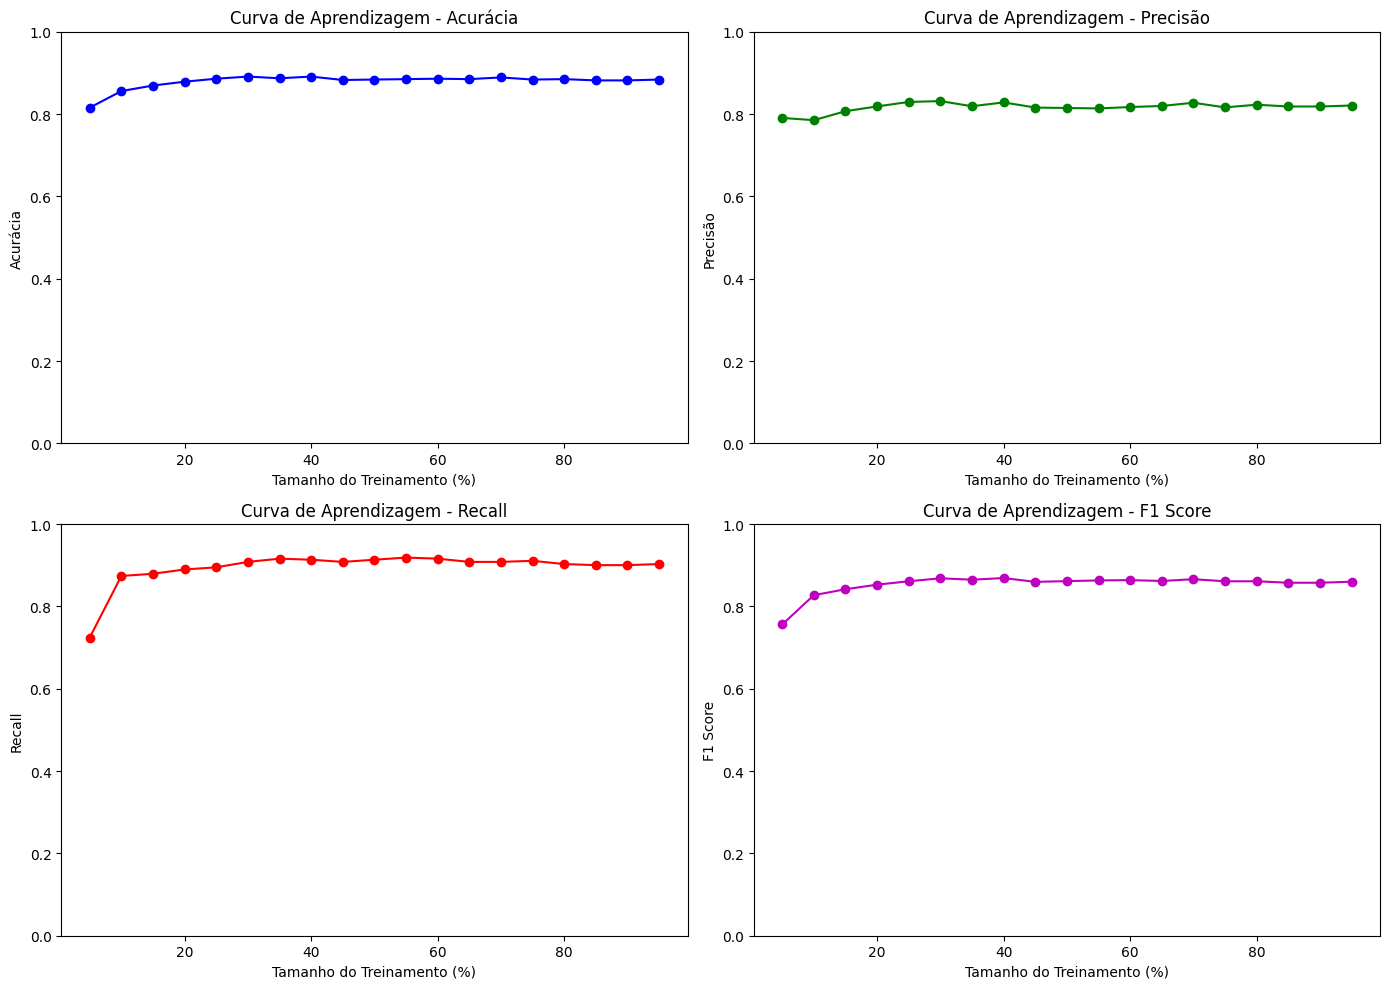

In [31]:
# Converter os tamanhos para porcentagem
train_sizes_percent = train_sizes * 100

plt.figure(figsize=(14, 10))

# Plotar Acurácia
plt.subplot(2, 2, 1)
plt.plot(train_sizes_percent, accuracy_scores, marker='o', color='b')
plt.title('Curva de Aprendizagem - Acurácia')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('Acurácia')
plt.ylim(0, 1)

# Plotar Precisão
plt.subplot(2, 2, 2)
plt.plot(train_sizes_percent, precision_scores, marker='o', color='g')
plt.title('Curva de Aprendizagem - Precisão')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('Precisão')
plt.ylim(0, 1)

# Plotar Recall
plt.subplot(2, 2, 3)
plt.plot(train_sizes_percent, recall_scores, marker='o', color='r')
plt.title('Curva de Aprendizagem - Recall')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('Recall')
plt.ylim(0, 1)

# Plotar F1 Score
plt.subplot(2, 2, 4)
plt.plot(train_sizes_percent, f1_scores, marker='o', color='m')
plt.title('Curva de Aprendizagem - F1 Score')
plt.xlabel('Tamanho do Treinamento (%)')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### Avaliação Final no Conjunto de Teste

In [32]:
# Treinar o modelo final com todos os dados de treinamento (X_train)
final_model = LogisticRegression(**best_params)
final_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_test_pred = final_model.predict(X_test)

# Calcular as métricas no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nAvaliação final no conjunto de teste:")
print(f"Acurácia: {test_accuracy:.4f}")
print(f"Precisão: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Avaliação final no conjunto de teste:
Acurácia: 0.8849
Precisão: 0.8130
Recall: 0.9191
F1 Score: 0.8628
